In [659]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Merge Datasets

In [660]:
completed_cases_data = pd.read_csv("pol-viol-cases - completed-cases.csv")
completed_cases_data.shape

(4327, 48)

In [661]:
capital_data = pd.read_csv("pol-viol-cases - jan6-capitol-riots.csv")
capital_data.shape

(1511, 48)

In [662]:
protests_2017_data = pd.read_csv("pol-viol-cases - jan20-2017-protests.csv")
protests_2017_data = protests_2017_data.drop(axis = 1, columns="Questionable inclusion") # Drop unnecessary column
protests_2017_data.shape

(214, 48)

In [663]:
pending_cases_data = pd.read_csv("pol-viol-cases - pending-cases.csv")
pending_cases_data.shape

(296, 48)

In [664]:
summer_fall_cases_data = pd.read_csv("pol-viol-cases - completed-cases.csv")
summer_fall_cases_data.shape

(4327, 48)

In [665]:
data = pd.concat([completed_cases_data, pending_cases_data, capital_data, protests_2017_data, summer_fall_cases_data])
data.shape

(10675, 48)

# Ideological Target

In [666]:
data['Ideological target'].value_counts()

Ideological target
Unspecified                                 2993
Government: federal                         2271
Identity: race/ethnicity                    1473
Multiple motivations                         508
Identity: sexuality/gender                   356
General public                               326
Government: police                           277
Religious: Jewish                            272
Industry: land development                   232
Industry: abortion                           204
Religious: Muslim                            200
Government: military                         200
Identity: nationality                        195
Government: state                            178
Identity: political affiliation              145
Industry: animal products/food/research      120
Identity: other                              102
Religious: Christian                          62
Government: foreign/non-U.S.                  61
Industry: private corporations                60
G

In [667]:
data['Ideological target'] = data['Ideological target'].replace('Identity: sexuality', 'Identity: sexuality/gender')

In [668]:
def categorize_target(target):
    target = str(target).lower()
    
    if 'government' in target:
        return 'Government'
    elif 'identity' in target:
        return 'Identity-Based'
    elif 'religious' in target:
        return 'Religious'
    elif 'industry' in target:
        return 'Industry/Business'
    elif 'general public' in target:
        return 'General Public'
    elif 'multiple' in target:
        return 'Multiple Motivations'
    elif 'unspecified' in target:
        return 'Unspecified'
    else:
        return 'Other'


In [669]:
data['Ideological Target Generalized'] = data['Ideological target'].apply(categorize_target)

In [670]:
data['Ideological Target Generalized'].value_counts()

Ideological Target Generalized
Government              3021
Unspecified             2993
Identity-Based          2273
Industry/Business        651
Religious                572
Multiple Motivations     508
Other                    331
General Public           326
Name: count, dtype: int64

# Ideological Affiliation

In [671]:
data['Ideological affiliation'].value_counts()

Ideological affiliation
Rightist: identity-focused      3231
Rightist: government-focused    1987
Salafi/Jihadist/Islamist        1917
Leftist: government-focused      709
No affiliation/not a factor      672
Leftist: eco-animal focused      421
Unclear                          332
Rightist: unspecified            316
Nationalist-separatist           225
Rightist: abortion-focused       212
Other                            132
Leftist: identity-focused        117
Leftist: unspecified              28
Rightist: government focused       1
Name: count, dtype: int64

In [672]:
def categorize_target(target):
    target_copy = str(target).lower()
    
    if 'rightist' in target_copy:
        return 'Rightist'
    elif 'leftist' in target_copy:
        return 'Leftist'
    else:
        return target


In [673]:
data['Ideological Affiliation Generalized'] = data['Ideological affiliation'].apply(categorize_target)

In [674]:
data['Ideological Affiliation Generalized'].value_counts()

Ideological Affiliation Generalized
Rightist                       5747
Salafi/Jihadist/Islamist       1917
Leftist                        1275
No affiliation/not a factor     672
Unclear                         332
Nationalist-separatist          225
Other                           132
Name: count, dtype: int64

# Criminal Method

In [675]:
data['Criminal method'].value_counts()

Criminal method
Providing material support                                2455
Blockading                                                1089
Threat/Harassment                                          956
Firearms: civilian                                         828
Explosives                                                 798
Unarmed assault                                            749
Other weapons                                              701
Criminal violation not linked or motivated politically     626
Vandalism/sabotage                                         506
Arson                                                      429
Uncategorized                                              312
Perjury/obstruction of justice                             206
Armed intimidation/standoff                                190
Hostage-taking                                             183
Firearms: military                                         136
Vehicle ramming                        

# Length of Prison Sentence (Months)

In [676]:
data['Length of prison sentence (months)'] = data['Length of prison sentence (months)'].replace(["#", "X", "Data not available", "Pending", "pending"], 0)

In [677]:
data['Length of prison sentence (months)'] = data['Length of prison sentence (months)'].astype(float)

In [678]:
data['Length of prison sentence (years)'] = round(data['Length of prison sentence (months)'] / 12, 2)

In [679]:
# Make anything sentenced > 100 years = 100 years because that is already a life sentence
data['Length of prison sentence (years)'] = np.where(data['Length of prison sentence (years)'] > 100, 100, data['Length of prison sentence (years)'])

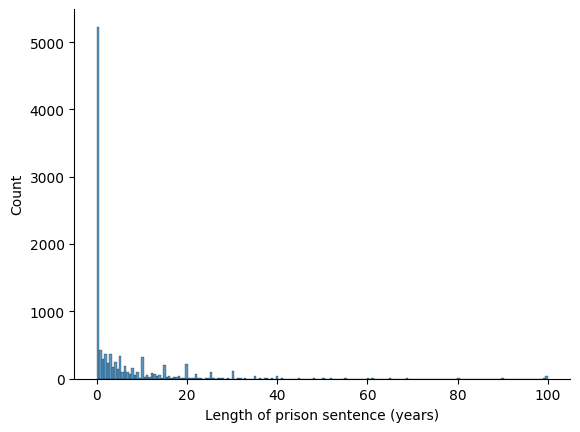

In [680]:
_ = sns.histplot(data['Length of prison sentence (years)'])
sns.despine()

# Age

In [681]:
data['Age'].unique()

array(['20', '33', '26', '48', '29', '34', '57', '24', '#', '44', '27',
       '18', '35', '67', '16', '45', '52', '17', '47', '39', '19', '22',
       '21', '46', '37', '50', '31', '54', '30', '38', '32', '53', '56',
       '55', '25', '36', '28', '40', '42', 'Unknown', '59', '62', '23',
       '15', '51', '58', '65', '41', '72', '43', '64', '60', '49', '61',
       '66', '73', '63', '14', '74', '69', '77', '76', 'unknown', '79',
       '75', '68', '71', '70', '88', '01/18/1900', '01/19/1900', '78',
       '$50.00', '$39.00', '87', '80'], dtype=object)

In [682]:
data['Age'] = data['Age'].replace(["#", "Unknown", "unknown", "01/18/1900", "01/19/1900", "$50.00", "$39.00"], 0)

In [683]:
data["Age"] = data["Age"].astype(int)

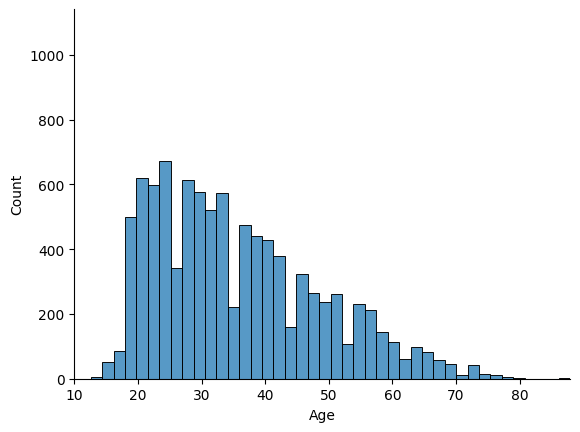

In [684]:
_ = sns.histplot(data["Age"])
_ = plt.xlim(10, data["Age"].max()) 
sns.despine()

# Gender

In [685]:
data["Gender"].value_counts()

Gender
Male                     9413
Female                   1223
Unknown/unclear            23
Gender non-conforming      15
Name: count, dtype: int64

# Religion

In [686]:
data["Religion"].value_counts()

Religion
Unknown          7053
Muslim           2184
Christian        1322
Other              79
Jewish             29
Non-religious       7
Name: count, dtype: int64

# Racial / Ethnic Group

In [687]:
data["Racial/ethnic group"].value_counts()

Racial/ethnic group
White/Caucasian                   6649
Middle Eastern/North African      1431
Black/African/African American     786
Unknown                            707
Latino/Hispanic                    677
Asian/South Asian                  305
American Indian/Alaska Native       44
Biracial/Multiracial                39
Black/African/African America       16
Hawaiian/Pacific Islander           13
America Indian/Alaska Native         1
Name: count, dtype: int64

# Physical Target

In [688]:
data["Physical target"].value_counts()

Physical target
No direct target                               3034
Individual person(s)                           2308
Federal site: non-military non-judicial        1712
Multiple types                                  500
Private site: business/corporate property       452
Unspecified/unknown/undeveloped                 389
Public site: event                              362
Religious institution                           333
Private site: residential                       299
Medical institution                             206
Federal site: military                          166
Public: commercial space of recreation          163
Municipal: local law enforcement                137
Educational institution                         119
Mass transportation: water                      106
Public: non-commercial space                     84
Online                                           48
Mass transportation: air                         46
Mass transportation: ground                     

In [689]:
def categorize_target(target):
    target_copy = str(target).lower()
    if 'private site' in target_copy:
        return 'Private Site'
    elif 'public site' in target_copy:
        return 'Public site'
    elif 'federal site' in target_copy:
        return 'Federal site'
    elif 'state site' in target_copy:
        return 'State site'
    elif 'mass transportation' in target_copy:
        return 'Mass transportation'
    else:
        return target


In [690]:
data["Physical Target Generalized"] = data["Physical target"].apply(categorize_target)

In [691]:
data["Physical Target Generalized"].value_counts()

Physical Target Generalized
No direct target                          3034
Individual person(s)                      2308
Federal site                              1931
Private Site                               751
Multiple types                             500
Unspecified/unknown/undeveloped            389
Public site                                362
Religious institution                      333
Mass transportation                        223
Medical institution                        206
Public: commercial space of recreation     163
Municipal: local law enforcement           137
Educational institution                    119
Public: non-commercial space                84
State site                                  59
Online                                      48
Name: count, dtype: int64

# Group Affiliation

In [692]:
data['Group affiliation'] = data['Group affiliation'].replace(['No known affiliation', 'No known Affiliation', 'No known affliation', 'No known affiliatoin',  'No Known affiliation', 'No Known Affiliation',  'No known afiliation', 'No known affilliation', 'No known affilation', 'No known afilliation', 'No known affiliaton', 'Unspecified affiliation', 'Unspecified afiiliation', 'Unspecified affliation', 'Unknown'], 'No Known Affiliation')

In [693]:
def categorize_target(target): # For post splitting
    target_copy = str(target).lower()
    if 'ku klux klan' in target_copy or 'unknown kkk group' in target_copy:
        return 'Ku Klux Klan'
    elif 'proud boy' in target_copy:
        return 'Proud Boys'
    elif 'aryan nation (an)' in target_copy:
        return 'Aryan Nations (AN)'
    elif 'revolutionary armed forces of columbia (farc)' in target_copy:
        return 'Revolutionary Armed Forces of Colombia (FARC)'
    elif 'united self defense forces of columbia (auc)' in target_copy:
        return 'United Self Defense Forces of Colombia (AUC)'
    elif 'islamic state of iraq and the levant (isis)' in target_copy:
        return 'Islamic State of Iraq and the Levant (IS/ISIL/ISIS)'
    elif 'national socialist club 131 (nsc-131)' in target_copy:
        return 'Nationalist Social Club (NSC-131)'
    elif 'al-qa\'ida (aq)' in target_copy \
    or 'al qaeda (aq)' in target_copy:
        return 'al-Qa’ida (AQ)'
    else:
        return target


In [694]:
split_cols = data['Group affiliation'].str.split(r"[,;]", expand=True)
split_cols.columns = ['Group Affiliation 1', 'Group Affiliation 2', 'Group Affiliation 3', 'Group Affiliation 4']

data = pd.concat([data, split_cols], axis=1)

In [695]:
data['Group Affiliation 1'] = data['Group Affiliation 1'].apply(categorize_target)
data['Group Affiliation 2'] = data['Group Affiliation 2'].apply(categorize_target)
data['Group Affiliation 3'] = data['Group Affiliation 3'].apply(categorize_target)
data['Group Affiliation 4'] = data['Group Affiliation 4'].apply(categorize_target)

In [696]:
data[['Group affiliation', 'Group Affiliation 1', 'Group Affiliation 2', 'Group Affiliation 3']].sample(10)

,Group affiliation,Group Affiliation 1,Group Affiliation 2,Group Affiliation 3
652,Washington State Militia,Washington State Militia,None,None
1557,Jemaah Islamiyah (JI),Jemaah Islamiyah (JI),None,None
958,Revolutionary Armed Forces of Columbia (FARC),Revolutionary Armed Forces of Colombia (FARC),None,None
1118,Animal Liberation Front (ALF),Animal Liberation Front (ALF),None,None
3585,No Known Affiliation,No Known Affiliation,None,None
2982,"Unforgiven, United Aryan Brotherhood (UAB)",Unforgiven,United Aryan Brotherhood (UAB),None
2835,No Known Affiliation,No Known Affiliation,None,None
3375,Hizballah,Hizballah,None,None
3565,No Known Affiliation,No Known Affiliation,None,None
1060,"al-Qa’ida (AQ), Taliban",al-Qa’ida (AQ),Taliban,None


# Veteran Status

In [697]:
data["Veteran status"].value_counts()

Veteran status
Civilian                                             9302
Former Active duty                                    349
Active duty                                            66
Former/current member of non-U.S. military             54
Honorably discharged                                   44
Former reserve components                              20
Reserve/national guard (reserve components)            19
Former active duty and reserve components              12
Former active duty and current reserve components       6
Unknown                                                 2
Other than honorable discharge                          2
Name: count, dtype: int64

In [698]:
data["Veteran status"] = data["Veteran status"].replace(['Former Active duty',
 'Former/current member of non-U.S. military',
 'Active duty',
 'Unknown',
 'Former active duty and reserve components',
 'Honorably discharged',
 'Former reserve components',
 'Other than honorable discharge',
 'Reserve/national guard (reserve components)',
 'Former active duty and current reserve components'], "Active duty")

In [699]:
data["Veteran status"].value_counts()

Veteran status
Civilian       9302
Active duty     574
Name: count, dtype: int64

# Citzenship

In [700]:
data["Citizenship status"].value_counts()

Citizenship status
U.S. citizen                   8169
Foreign national               1361
Unknown                         194
U.S. permanent resident         154
Residing in U.S. on visa         80
Residing in U.S. as refugee      25
Name: count, dtype: int64

In [701]:
data["Citizenship status"] = data["Citizenship status"].replace(['Foreign national',
 'Unknown',
 'Residing in U.S. on visa',
 'U.S. permanent resident',
 'Residing in U.S. as refugee'], "Foreign national")

In [702]:
data["Citizenship status"].value_counts()

Citizenship status
U.S. citizen        8169
Foreign national    1814
Name: count, dtype: int64

## Reordering Columns Part 1

In [703]:
cols = data.columns.tolist() # create initial column list
cols = cols[:21] + cols[-4:] + cols[21:-4] # Move group affiliation columns
cols = cols[:17] + cols[-1:] + cols[17:-1] # Move physical target columnn
cols = cols[:38] + cols[-1:] + cols[38:-1] # Move prison sentence length column
cols = cols[:20] + cols[-1:] + cols[20:-1] # Move ideological affiliation column
cols = cols[:19] + cols[-1:] + cols[19:-1] # Move ideological target column

In [704]:
data = data[cols] # Reorder all columns to be based on cols
data.columns

Index(['Date', 'Date descriptor', 'Case ID', 'Group identifier',
       'Full legal name', 'First name', 'Family name', 'Other names/aliases',
       'Co-offender', 'Reason for inclusion', 'Name of case', 'Jurisdiction',
       'Location: country', 'Location: state', 'Location: city',
       'People vs. property', 'Physical target', 'Physical Target Generalized',
       'Ideological target', 'Ideological Target Generalized',
       'Ideological affiliation', 'Ideological Affiliation Generalized',
       'Affiliation with FTO', 'Group affiliation', 'Group Affiliation 1',
       'Group Affiliation 2', 'Group Affiliation 3', 'Group Affiliation 4',
       'Hate crime', 'LEO informant', 'Previous similar method',
       'Criminal method', 'Additional criminal method', 'Completion of crime',
       '# killed', '# injured', 'Charges', 'Plea', 'Verdict',
       'Length of prison sentence (months)',
       'Length of prison sentence (years)', 'Life sentence', 'Death sentence',
       'Additiona

# Drop Useless Columns

In [705]:
data = data.drop(axis = 1, columns=['Case ID', 'Group identifier', 'First name', 'Family name', 'Other names/aliases', 'Reason for inclusion', 'Name of case', 'Jurisdiction', 'Location: country', 'Completion of crime', 'Plea', 'Death sentence', 'Source description'])
data.columns

Index(['Date', 'Date descriptor', 'Full legal name', 'Co-offender',
       'Location: state', 'Location: city', 'People vs. property',
       'Physical target', 'Physical Target Generalized', 'Ideological target',
       'Ideological Target Generalized', 'Ideological affiliation',
       'Ideological Affiliation Generalized', 'Affiliation with FTO',
       'Group affiliation', 'Group Affiliation 1', 'Group Affiliation 2',
       'Group Affiliation 3', 'Group Affiliation 4', 'Hate crime',
       'LEO informant', 'Previous similar method', 'Criminal method',
       'Additional criminal method', '# killed', '# injured', 'Charges',
       'Verdict', 'Length of prison sentence (months)',
       'Length of prison sentence (years)', 'Life sentence',
       'Additional details', 'Age', 'Gender', 'Other status',
       'Racial/ethnic group', 'Religion', 'Veteran status', 'Combat veteran',
       'Service classification', 'Citizenship status', 'Tags',
       'Short narrative'],
      dtype='obje

# Date

In [706]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [707]:
data['Date'].min(), data['Date'].max()

(Timestamp('1990-01-22 00:00:00'), Timestamp('2024-10-02 00:00:00'))

In [708]:
data['Date'].value_counts()

Date
2017-01-20    214
2018-04-11    116
2019-09-03    114
2019-09-13    102
2005-04-29    100
             ... 
2023-11-14      1
2022-01-11      1
2023-05-24      1
2024-06-19      1
2018-07-14      1
Name: count, Length: 2528, dtype: int64

# Date Descriptor

In [709]:
data['Date descriptor'].value_counts()

Date descriptor
Indictment            7399
Arrest/arraignment     871
Crime/attack           751
Complaint              651
Unknown/unclear        393
Sentencing             300
Plea                   234
Conviction              76
Name: count, dtype: int64

# Full Legal Name

In [710]:
data['Full legal name'].value_counts()

Full legal name
Mahde Dannon                4
Filthy Fuhrer               4
Roy Naughton                4
Glen Baldwin                4
Craig King                  4
                           ..
Daniel Warmus               1
John Juran                  1
Anton Lunyk                 1
Leonard Pearson Ridge IV    1
Michael Basillas            1
Name: count, Length: 6324, dtype: int64

# Co-offender

In [711]:
data['Co-offender'] = data['Co-offender'].replace(['No '], 'No')

In [712]:
data['Co-offender'].value_counts()

Co-offender
Yes    6729
No     3946
Name: count, dtype: int64

# People vs. property

In [713]:
data['People vs. property'] = data['People vs. property'].replace(['Property '], 'Property')
data['People vs. property'] = data['People vs. property'].replace(['People and Property'], 'People and property')
data['People vs. property'] = data['People vs. property'].fillna('Unspecified/unknown/undeveloped')

In [714]:
data['People vs. property'].value_counts()

People vs. property
People                             3483
No direct target                   3010
Property                           1995
People and property                1490
Unspecified/unknown/undeveloped     697
Name: count, dtype: int64

# Affiliation with FTO

In [715]:
data['Affiliation with FTO'].isna().sum()

13

In [716]:
data['Affiliation with FTO'] = data['Affiliation with FTO'].fillna('Unknown')

In [717]:
data['Affiliation with FTO'].value_counts()

Affiliation with FTO
No         8350
Yes        2312
Unknown      13
Name: count, dtype: int64

# Hate Crime

In [718]:
data['Hate crime'].isna().sum()

22

In [719]:
data['Hate crime'] = data['Hate crime'].fillna('Unknown')

In [720]:
data['Hate crime'].value_counts()

Hate crime
No         8747
Yes        1906
Unknown      22
Name: count, dtype: int64

# LEO Informant

In [721]:
data['LEO informant'].isna().sum()

385

In [722]:
data['LEO informant'] = data['LEO informant'].fillna('Unknown')

In [723]:
data['LEO informant'].value_counts()

LEO informant
No         7999
Yes        2291
Unknown     385
Name: count, dtype: int64

# Previous Similar Method

In [724]:
data['Previous similar method'].isna().sum()

806

In [725]:
data['Previous similar method'] = data['Previous similar method'].fillna('Unknown')

In [726]:
data['Previous similar method'].value_counts()

Previous similar method
No         8363
Yes        1506
Unknown     806
Name: count, dtype: int64

# Additional Criminal Method

In [727]:
data['Additional criminal method'].isna().sum()

1504

In [728]:
data['Additional criminal method'] = data['Additional criminal method'].fillna('Unknown')

In [729]:
data['Additional criminal method'].value_counts()

Additional criminal method
No additional criminal method               6786
Unknown                                     1504
Firearms: civilian                           402
Threat/Harassment                            303
Blockading                                   238
Various methods                              204
Providing material support                   174
Explosives                                   163
Uncategorized                                158
Perjury/obstruction of justice               143
Unarmed assault                              125
Other weapons                                113
Hostage-taking                                94
Vandalism/sabotage                            82
Firearms: military                            67
Arson                                         60
Armed intimidation/standoff                   38
Vehicle ramming                               11
No secondary tactic                            6
Unknown/unspecified/undeveloped           

# \# Killed

In [730]:
data['# killed'].value_counts()

# killed
0           7624
0           1720
1            544
2            186
3             68
224           54
4             26
20            26
6             22
8             14
5             14
175           12
2,973         12
1             10
17             6
10             4
Unknown        4
270            4
23             4
9              4
Multiple       4
168            4
13             2
15             2
21             2
2,996          2
11             2
49             2
58             2
202            2
17             1
6              1
2              1
Name: count, dtype: int64

In [731]:
data['# killed'] = data['# killed'].replace(['Multiple'], 1)
data['# killed'] = data['# killed'].replace(['Unknown'], 0)
data['# killed'] = data['# killed'].fillna(0)

In [732]:
data['# killed'] = data['# killed'].replace(',', "", regex=True)
data['# killed'] = data['# killed'].replace(r'\.0', "", regex=True)
data['# killed'] = data['# killed'].astype(int)

In [733]:
data['Killed People'] = np.where(data['# killed'] > 0, 1, 0)
data['Killed People'].value_counts()

Killed People
0    9638
1    1037
Name: count, dtype: int64

# \# Injured

In [734]:
data['# injured'] = data['# injured'].replace(['Multiple'], 1)
data['# injured'] = data['# injured'].replace(['Unknown', '#'], 0)
data['# injured'] = data['# injured'].fillna(0)

In [735]:
data['# injured'] = data['# injured'].replace(',', "", regex=True)
data['# injured'] = data['# injured'].astype(int)

In [736]:
data['Injured People'] = np.where(data['# injured'] > 0, 1, 0)
data['Injured People'].value_counts()

Injured People
0    8675
1    2000
Name: count, dtype: int64

# Charges

In [737]:
data['Charges'].isna().sum()
data['Charges'] = data['Charges'].fillna('None')

In [738]:
data['Non-Dropped Charges'] = data['Charges'].str.replace(r'\*[^*;]+(?=;|$);?', '', regex=True).str.strip()
data['Non-Dropped Charges'] = data['Non-Dropped Charges'].fillna('None')

# Verdict

In [739]:
data['Verdict'].value_counts()

Verdict
Guilty                                         6990
Charged but not tried                          1357
Pending                                         832
Guilty on some charges/not guilty on others     774
Data not available                              492
Not guilty                                      204
Hung jury/mistrial                               14
Name: count, dtype: int64

In [740]:
def categorize_target(target):
    target_copy = str(target).lower()
    if 'guilty on some charges' in target_copy:
        return 'Guilty'
    elif 'charged but not tried' in target_copy:
        return 'Not guilty'
    elif 'hung jury' in target_copy:
        return 'Not guilty'
    else:
        return target


In [741]:
data['Verdict'] = data['Verdict'].apply(categorize_target)
data['Verdict'].value_counts()

Verdict
Guilty                7764
Not guilty            1575
Pending                832
Data not available     492
Name: count, dtype: int64

# Life sentence

In [742]:
data['Life sentence'].isna().sum()

21

In [743]:
data['Life sentence'].value_counts()

Life sentence
0                     7477
#                      945
Pending                895
Data not available     618
1                      356
0                      214
2                       56
4                       18
3                       16
X                       14
5                       12
8                        8
pending                  6
6                        4
90                       4
10                       4
12                       2
9                        2
34                       2
PENDING                  1
Name: count, dtype: int64

In [744]:
data['Life sentence'] = data['Life sentence'].replace(['Data not available', 'Pending', 'X', '#', 'PENDING', 'pending'], 0)
data['Life sentence'] = data['Life sentence'].fillna(0)
data['Life sentence'] = data['Life sentence'].astype(int)

In [745]:
data['Given Life Sentence'] = np.where(data['Life sentence'] > 0, 1, 0)
data['Given Life Sentence'].value_counts()

Given Life Sentence
0    10191
1      484
Name: count, dtype: int64

# Additional Details

In [746]:
data['Additional details'].isna().sum()

3159

In [747]:
data['Additional details'] = data['Additional details'].fillna('No')

# 'Other' Status

In [748]:
data['Other status'].isna().sum()

165

In [749]:
data['Other status'].value_counts()

Other status
Non-othered    6776
Othered        3733
Unknown           1
Name: count, dtype: int64

# Combat Veteran

In [750]:
data['Combat veteran'].isna().sum()

817

In [751]:
data['Combat veteran'] = data['Combat veteran'].fillna('Unknown')

In [752]:
data['Combat veteran'].value_counts()

Combat veteran
No         9467
Unknown     943
Yes         265
Name: count, dtype: int64

# Service Classification

In [753]:
data['Service classification'].isna().sum()

10188

In [754]:
data['Service classification'] = data['Service classification'].fillna('Unknown')

In [755]:
def categorize_target(target):
    target_copy = str(target).lower()
    if 'army' in target_copy:
        return 'Army'
    elif 'marine' in target_copy:
        return 'Marine'
    elif 'navy' in target_copy:
        return 'Navy'
    elif 'national guard' in target_copy:
        return 'National Guard'
    elif 'air force' in target_copy:
        return 'Air Force'
    elif 'n/a' in target_copy or 'n?a' in target_copy or 'n/q' in target_copy or 'unknown' in target_copy:
        return 'Unknown'
    else:
        return 'Other'


In [756]:
data['Service Classification Generalized'] = data['Service classification'].apply(categorize_target)

In [757]:
data['Service Classification Generalized'].value_counts()

Service Classification Generalized
Unknown           10226
Army                206
Marine              138
Navy                 50
National Guard       22
Air Force            20
Other                13
Name: count, dtype: int64

# Tags

In [758]:
data['Tags'].isna().sum()

7934

# Short Narrative

In [759]:
data['Short narrative'].isna().sum()

57

In [760]:
data['Short narrative'] = data['Short narrative'].fillna('Unknown Narrative')

# Reorder Columns

In [761]:
cols = data.columns.tolist() # create initial column list
cols = cols[:25] + [cols[-5]] + cols[25:-5] + cols[-4:] # Move killed people column
cols = cols[:27] + [cols[-4]] + cols[27:-4] + cols[-3:] # Move injured people column
cols = cols[:29] + [cols[-3]] + cols[29:-3] + cols[-2:] # Move non-dropped charges column
cols = cols[:34] + [cols[-2]] + cols[34:-2] + cols[-1:] # Move given life sentence column
cols = cols[:44] + [cols[-1]] + cols[44:-1] # Move generalized service classification column

In [762]:
data = data[cols] # Reorder all columns to be based on cols
data.columns

Index(['Date', 'Date descriptor', 'Full legal name', 'Co-offender',
       'Location: state', 'Location: city', 'People vs. property',
       'Physical target', 'Physical Target Generalized', 'Ideological target',
       'Ideological Target Generalized', 'Ideological affiliation',
       'Ideological Affiliation Generalized', 'Affiliation with FTO',
       'Group affiliation', 'Group Affiliation 1', 'Group Affiliation 2',
       'Group Affiliation 3', 'Group Affiliation 4', 'Hate crime',
       'LEO informant', 'Previous similar method', 'Criminal method',
       'Additional criminal method', '# killed', 'Killed People', '# injured',
       'Injured People', 'Charges', 'Non-Dropped Charges', 'Verdict',
       'Length of prison sentence (months)',
       'Length of prison sentence (years)', 'Life sentence',
       'Given Life Sentence', 'Additional details', 'Age', 'Gender',
       'Other status', 'Racial/ethnic group', 'Religion', 'Veteran status',
       'Combat veteran', 'Service cla

# Deleting Columns Part 2 

# Output to CSV

In [763]:
data.to_csv('data-fully-cleaned.csv', index=False)